In [1]:
# No.1
# MLP
# 姓名:李昊佳
from sklearn.neural_network import MLPClassifier


train_x = [[0, 0],[0,1],[1,1],[1, 0]]
train_y = [1,0,1,0]

test_x = [[0,1],[1,0],[0,1],[1,1]]
test_y = [0,0,0,1]

clf = MLPClassifier(solver='lbfgs', activation='logistic', alpha=1e-5, hidden_layer_sizes=(2),max_iter=100,random_state=1)
clf.fit(train_x, train_y)
y=clf.predict(test_x)
right = 0
num = len(test_x)
for i in range(num):
    if test_y[i]==y[i]:
        right+=1
print("测试数据:",test_x)
print("测试数据结果:",test_y)
print("预测结果:",y)
print("准确度:",right/num)

测试数据: [[0, 1], [1, 0], [0, 1], [1, 1]]
测试数据结果: [0, 0, 0, 1]
预测结果: [0 0 0 1]
准确度: 1.0


训练集大小: 105
测试集大小: 45
准确度: 1.0


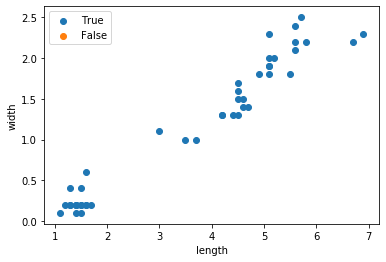

In [2]:
# No.2
# MLP
# 姓名:李昊佳
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier

import numpy as np
import matplotlib.pyplot as plt

train_ratio=0.7

iris = load_iris()

X = np.array(iris.data)
Y = np.array(iris.target)
#注意打乱数据集，不然传入的数据不全
rand_ind=np.random.permutation(X.shape[0])
X_rand=X[rand_ind]
Y_rand=Y[rand_ind]

train_num=int(X.shape[0]*train_ratio)
train_dataset=X_rand[:train_num]
train_target=Y_rand[:train_num]
print("训练集大小:",train_dataset.shape[0])
#测试数据集
test_dataset=X_rand[train_num:]
test_target=Y_rand[train_num:]
test_num=test_dataset.shape[0]
print("测试集大小:",test_dataset.shape[0])

clf = MLPClassifier(solver='adam', activation='logistic', learning_rate_init=0.01,alpha=1e-4, hidden_layer_sizes=(10,8),max_iter=1000,random_state=1)

clf.fit(train_dataset,train_target)
result=clf.predict(test_dataset)

right_arr=np.empty(test_dataset.shape[0],dtype='bool')
right_arr=(result==test_target)

right_num=np.count_nonzero(right_arr)
print("准确度:",right_num/test_num)


right_x=test_dataset[right_arr==True]
wrong_x=test_dataset[right_arr==False]


plt.figure()
plt.scatter(right_x[:,2],right_x[:,3],label="True")
plt.scatter(wrong_x[:,2],wrong_x[:,3],label="False")
plt.xlabel("length")
plt.ylabel("width")
plt.legend()
plt.show()



In [3]:
# No.3
# 回文数
# 姓名:李昊佳

def isPalindrome(x):
    x_abs=abs(x)
    x_string=str(x_abs)
    return x_string==x_string[::-1]

if __name__=="__main__":
    test_data=[123,121,-121,-122]
    right_result=[False,True,True,False]
    test_result=[]
    wrong_flag=False
    print("Test data:",test_data)
    for i in range(len(test_data)):
        test_result.append(isPalindrome(test_data[i]))
        if test_result[i]!=right_result[i]:
            print(test_data[i]+" test error!")
            wrong_flag=True
    print("Test result:",test_result)
    if wrong_flag:
        print("Test finished and funtion error!")
    else:
        print("Test finished and ALL pass!")


        

Test data: [123, 121, -121, -122]
Test result: [False, True, True, False]
Test finished and ALL pass!


In [4]:
# No.4
# 斐波那契数列
# 姓名:李昊佳

def fibonacci1(x):
    if x <= 0:
        return 0  # error
    elif x <=2:
        return 1
    else:
        x_1 = 1
        x_2 = 1
        for i in range(x-2):
            x_temp=x_1+x_2
            x_2=x_1
            x_1=x_temp
        return x_1

def fibonacci2(x):
    if x <= 0:
        return 0
    elif x <= 2:
        return 1
    else:
        return fibonacci2(x-1)+fibonacci2(x-2)

if __name__=="__main__":
    test_data=[5,6,20]
    right_result=[5,8,6765]
    test_result=[]
    wrong_flag=False
    print("Test data:",test_data)
    for i in range(len(test_data)):
        test_result.append(fibonacci2(test_data[i]))
        if test_result[i]!=right_result[i]:
            print(test_data[i]+" test error!")
            wrong_flag=True
    print("Test result:",test_result)
    if wrong_flag:
        print("Test finished and funtion error!")
    else:
        print("Test finished and ALL pass!")


Test data: [5, 6, 20]
Test result: [5, 8, 6765]
Test finished and ALL pass!


In [5]:
# No.5
# 有序列表合并
# 姓名:李昊佳

def bubble_sort(l):
    for i in range(len(l)-1):
        flag = True
        for j in range(len(l)-1,i,-1):
            if l[j-1]>l[j]:
                temp=l[j]
                l[j]=l[j-1]
                l[j-1]=temp
                flag=False
        if flag:
            break
    return l


def sort_list_slow(l1,l2):
    l3=l1+l2
    bubble_sort(l3)
    return l3

def get_index(arr,num):
    if(len(arr) != 0):
        for i in range(len(arr)):
            if num <= arr[i]:
                return i
        return len(arr)
    else:
        return 0


def sort_list_fast(l1,l2):
    l3=l1.copy()
    for data in l2:
        ind=get_index(l3,data)
        l3.insert(ind,data)
    
    return l3


if __name__=="__main__":
    test_data=[[[1,2,2,4], [1,3,3]],[[1,100], [2,4,8,10]],[[], [1,2,3]],[ [],[] ]]
    right_result=[[1,1,2,2,3,3,4] ,[1,2,4,8,10,100],[1,2,3],[]]
    test_result=[]
    wrong_flag=False
    print("Test data:",test_data)
    for i in range(len(test_data)):
        test_result.append(sort_list_fast(test_data[i][0],test_data[i][1]))
        if test_result[i]!=right_result[i]:
            print(str(test_data[i])+" test error!")
            wrong_flag=True
    print("Test result:",test_result)
    if wrong_flag:
        print("Test finished and funtion error!")
    else:
        print("Test finished and ALL pass!")

Test data: [[[1, 2, 2, 4], [1, 3, 3]], [[1, 100], [2, 4, 8, 10]], [[], [1, 2, 3]], [[], []]]
Test result: [[1, 1, 2, 2, 3, 3, 4], [1, 2, 4, 8, 10, 100], [1, 2, 3], []]
Test finished and ALL pass!
